In [1]:
!pip install chromedriver-binary-auto


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from time import sleep
import pandas as pd
import chromedriver_binary # adds the chromedriver binary to the path
driver = webdriver.Chrome()

In [ ]:
options = webdriver.ChromeOptions()
options.add_argument("start-maximized")

# remove all signs of this being an automated browser
options.add_argument('--disable-blink-features=AutomationControlled')
options.add_experimental_option("excludeSwitches", ["enable-automation"])
options.add_experimental_option('useAutomationExtension', False)

# open the browser with the new options
driver = webdriver.Chrome(options=options)
driver.get('https://www.amazon.co.jp')

In [5]:
# Locate the search input field by its ID and enter the search query
input_search = driver.find_element(By.ID,'twotabsearchtextbox')
input_search.send_keys("防犯グッズ 護身用")

In [6]:
# Find and click the search button to initiate the search
search_button = driver.find_element(By.XPATH, '//*[@id="nav-search-submit-button"]')
search_button.click()
sleep(1)

In [7]:
#Bestseller
best_seller_label = driver.find_element(By.CSS_SELECTOR,".a-badge-label")
best_seller_label.click()

# Count the number of bestseller products
best_seller_count = len(driver.find_elements(By.CSS_SELECTOR, ".a-badge-label"))
print("Number of bestseller:", best_seller_count)

Number of bestseller: 1


In [8]:
#ProductName
results = driver.find_elements(By.CLASS_NAME, "a-size-base-plus")
len(results)

59

In [9]:
#Popularity
# popular = driver.find_elements(By.CSS_SELECTOR, "aria-label")
popular = driver.find_elements(By.CLASS_NAME, "a-size-base")
print(popular[3].text)

117


In [10]:
for result in popular:
    print(result.text)

1-48 of 590 results for "防犯グッズ 護身用"
Sort by:
        
            Featured
        
            Price: Low to High
        
            Price: High to Low
        
            Avg. Customer Review
        
            Newest Arrivals
        
    Sort by:Featured
Price and other details may vary based on product size and color.
Price and other details may vary based on product size and color.
117
50+ bought in past month
50+ bought in past month
¥1,498 Was:
¥1,890
¥1,498 Was:
¥1,890
Was:
15 pt (1%)
Ships to United States
Small Business



74
¥999
¥999
50 pt (5%)
Save ¥100
Ships to United States
1
¥899
¥899
9 pt (1%)
Get it Tue, Aug 29 - Thu, Sep 7
1
¥599
¥599
6 pt (1%)
Get it Tue, Aug 29 - Thu, Sep 7
111
200+ bought in past month
200+ bought in past month
¥2,480
¥2,480
Ships to United States
57
¥3,999
¥3,999
80 pt (2%)
Save 10%
Ships to United States
2,123
¥4,399 Was:
¥4,999
¥4,399 Was:
¥4,999
Was:
Ships to United States
79
¥4,800
¥4,800
Ships to United States
More Buying Choices
¥3,98

In [11]:
#Price
prices = driver.find_elements(By.CLASS_NAME, "a-price")
len(prices)

68

In [12]:
for result in prices:
    print(result.text)

¥1,498
¥1,890
¥999
¥899
¥599
¥2,480
¥3,999
¥4,399
¥4,999
¥4,800
¥359
¥3,280
¥5,980
¥1,799
¥1,780
¥899
¥999
¥771
¥960
¥5,999
¥599
¥654
¥2,199
¥520
¥1,699
¥1,498
¥1,890
¥999
¥1,899
¥4,480
¥1,680
¥599
¥799
¥1,799
¥1,398
¥1,799
¥1,899
¥4,180
¥469
¥999
¥800
¥1,500
¥2,655
¥1,899
¥1,380
¥1,983
¥4,380
¥2,980
¥3,180
¥2,199
¥999
¥1,280
¥599
¥800
¥1,359
¥740
¥399
¥2,500
¥3,280
¥999
¥1,099
¥999
¥1,399
¥1,580
¥1,398
¥3,699
¥2,864
¥3,699


In [19]:
# Extract the data
product_tiles = driver.find_elements(By.CLASS_NAME, 's-card-container')
product_names = []
prices = []

for product in product_tiles:
    try:
        name = product.find_element(By.CLASS_NAME, "a-size-base-plus").text
    except:
        name = "N/A"
    try:
        price = product.find_element(By.CLASS_NAME, "a-price").text
    except:
        price = "N/A"
    product_names.append(name)
    prices.append(price)

# Create a DataFrame
data = {
    'Product Name': product_names,
    'Price': prices
}

df = pd.DataFrame(data)

# Print the DataFrame
print(df)

# Close the WebDriver
driver.quit()

MaxRetryError: HTTPConnectionPool(host='localhost', port=64774): Max retries exceeded with url: /session/c0414164ddc9ffef1a7b64efa8f58da1/elements (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1330665f0>: Failed to establish a new connection: [Errno 61] Connection refused'))

/var/folders/b9/cydbsq5x5glf23_nw44c9y180000gn/T/ipykernel_6085/3167449016.py:22: UserWarning: Glyph 65298 (\N{FULLWIDTH DIGIT TWO}) missing from current font.
  plt.tight_layout()
/var/folders/b9/cydbsq5x5glf23_nw44c9y180000gn/T/ipykernel_6085/3167449016.py:22: UserWarning: Glyph 20491 (\N{CJK UNIFIED IDEOGRAPH-500B}) missing from current font.
  plt.tight_layout()
/var/folders/b9/cydbsq5x5glf23_nw44c9y180000gn/T/ipykernel_6085/3167449016.py:22: UserWarning: Glyph 12475 (\N{KATAKANA LETTER SE}) missing from current font.
  plt.tight_layout()
/var/folders/b9/cydbsq5x5glf23_nw44c9y180000gn/T/ipykernel_6085/3167449016.py:22: UserWarning: Glyph 12483 (\N{KATAKANA LETTER SMALL TU}) missing from current font.
  plt.tight_layout()
/var/folders/b9/cydbsq5x5glf23_nw44c9y180000gn/T/ipykernel_6085/3167449016.py:22: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from current font.
  plt.tight_layout()
/var/folders/b9/cydbsq5x5glf23_nw44c9y180000gn/T/ipykernel_6085/3167449016.py:22: Use

/Users/mayumioshige/.pyenv/versions/3.10.11/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65298 (\N{FULLWIDTH DIGIT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mayumioshige/.pyenv/versions/3.10.11/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20491 (\N{CJK UNIFIED IDEOGRAPH-500B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mayumioshige/.pyenv/versions/3.10.11/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12475 (\N{KATAKANA LETTER SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mayumioshige/.pyenv/versions/3.10.11/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12483 (\N{KATAKANA LETTER SMALL TU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mayumioshige/.pyenv/versions/3.10.11/lib/python3.10/site-packages/IPython/core/pyl

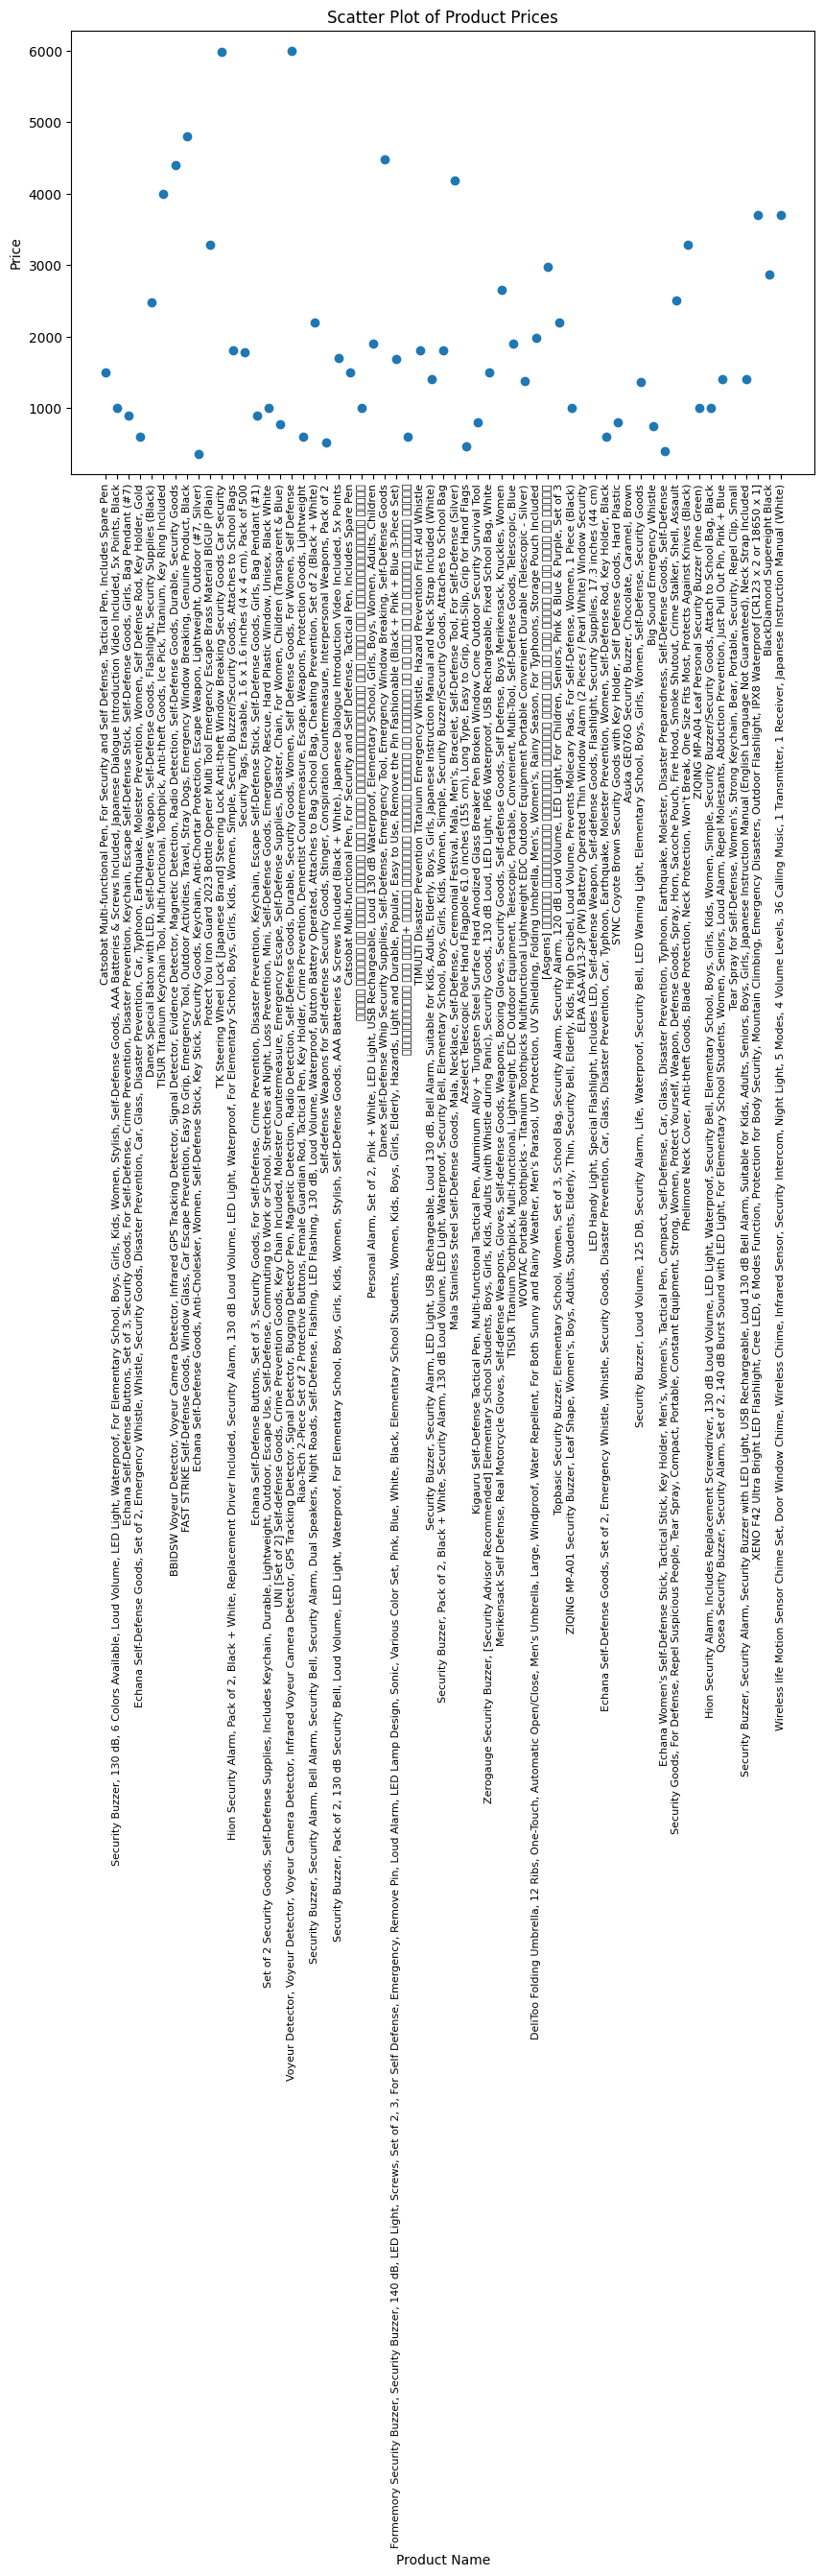

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Your code to create the DataFrame
# ...

# Replace 'N/A' values in 'Price' column with NaN
df['Price'] = df['Price'].replace('N/A', np.nan)

# Convert 'Price' column to numerical values
df['Price'] = df['Price'].replace('[\¥,]', '', regex=True).astype(float)

# Create a scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(np.arange(len(df)), df['Price'])
ax.set_xticks(np.arange(len(df)))
ax.set_xticklabels(df['Product Name'], rotation=90, fontsize=8)  # Adjust fontsize as needed
ax.set_xlabel('Product Name')
ax.set_ylabel('Price')
ax.set_title('Scatter Plot of Product Prices')
plt.tight_layout()

# Display the plot
plt.show()


In [22]:
median_price = df['Price'].median()
average_price = df['Price'].mean()

print("Median Price:", median_price)
print("Average Price:", average_price)


Median Price: 1500.0
Average Price: 1972.4545454545455


/var/folders/b9/cydbsq5x5glf23_nw44c9y180000gn/T/ipykernel_6085/3977471372.py:22: UserWarning: Glyph 65298 (\N{FULLWIDTH DIGIT TWO}) missing from current font.
  plt.tight_layout()
/var/folders/b9/cydbsq5x5glf23_nw44c9y180000gn/T/ipykernel_6085/3977471372.py:22: UserWarning: Glyph 20491 (\N{CJK UNIFIED IDEOGRAPH-500B}) missing from current font.
  plt.tight_layout()
/var/folders/b9/cydbsq5x5glf23_nw44c9y180000gn/T/ipykernel_6085/3977471372.py:22: UserWarning: Glyph 12475 (\N{KATAKANA LETTER SE}) missing from current font.
  plt.tight_layout()
/var/folders/b9/cydbsq5x5glf23_nw44c9y180000gn/T/ipykernel_6085/3977471372.py:22: UserWarning: Glyph 12483 (\N{KATAKANA LETTER SMALL TU}) missing from current font.
  plt.tight_layout()
/var/folders/b9/cydbsq5x5glf23_nw44c9y180000gn/T/ipykernel_6085/3977471372.py:22: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from current font.
  plt.tight_layout()
/var/folders/b9/cydbsq5x5glf23_nw44c9y180000gn/T/ipykernel_6085/3977471372.py:22: Use

Median Price: 1500.0
Average Price: 1972.4545454545455


/var/folders/b9/cydbsq5x5glf23_nw44c9y180000gn/T/ipykernel_6085/3977471372.py:32: UserWarning: Glyph 65298 (\N{FULLWIDTH DIGIT TWO}) missing from current font.
  fig.savefig('scatter_plot.jpg', format='jpeg', bbox_inches='tight')
/var/folders/b9/cydbsq5x5glf23_nw44c9y180000gn/T/ipykernel_6085/3977471372.py:32: UserWarning: Glyph 20491 (\N{CJK UNIFIED IDEOGRAPH-500B}) missing from current font.
  fig.savefig('scatter_plot.jpg', format='jpeg', bbox_inches='tight')
/var/folders/b9/cydbsq5x5glf23_nw44c9y180000gn/T/ipykernel_6085/3977471372.py:32: UserWarning: Glyph 12475 (\N{KATAKANA LETTER SE}) missing from current font.
  fig.savefig('scatter_plot.jpg', format='jpeg', bbox_inches='tight')
/var/folders/b9/cydbsq5x5glf23_nw44c9y180000gn/T/ipykernel_6085/3977471372.py:32: UserWarning: Glyph 12483 (\N{KATAKANA LETTER SMALL TU}) missing from current font.
  fig.savefig('scatter_plot.jpg', format='jpeg', bbox_inches='tight')
/var/folders/b9/cydbsq5x5glf23_nw44c9y180000gn/T/ipykernel_6085/39774

/Users/mayumioshige/.pyenv/versions/3.10.11/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65298 (\N{FULLWIDTH DIGIT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mayumioshige/.pyenv/versions/3.10.11/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20491 (\N{CJK UNIFIED IDEOGRAPH-500B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mayumioshige/.pyenv/versions/3.10.11/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12475 (\N{KATAKANA LETTER SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mayumioshige/.pyenv/versions/3.10.11/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12483 (\N{KATAKANA LETTER SMALL TU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mayumioshige/.pyenv/versions/3.10.11/lib/python3.10/site-packages/IPython/core/pyl

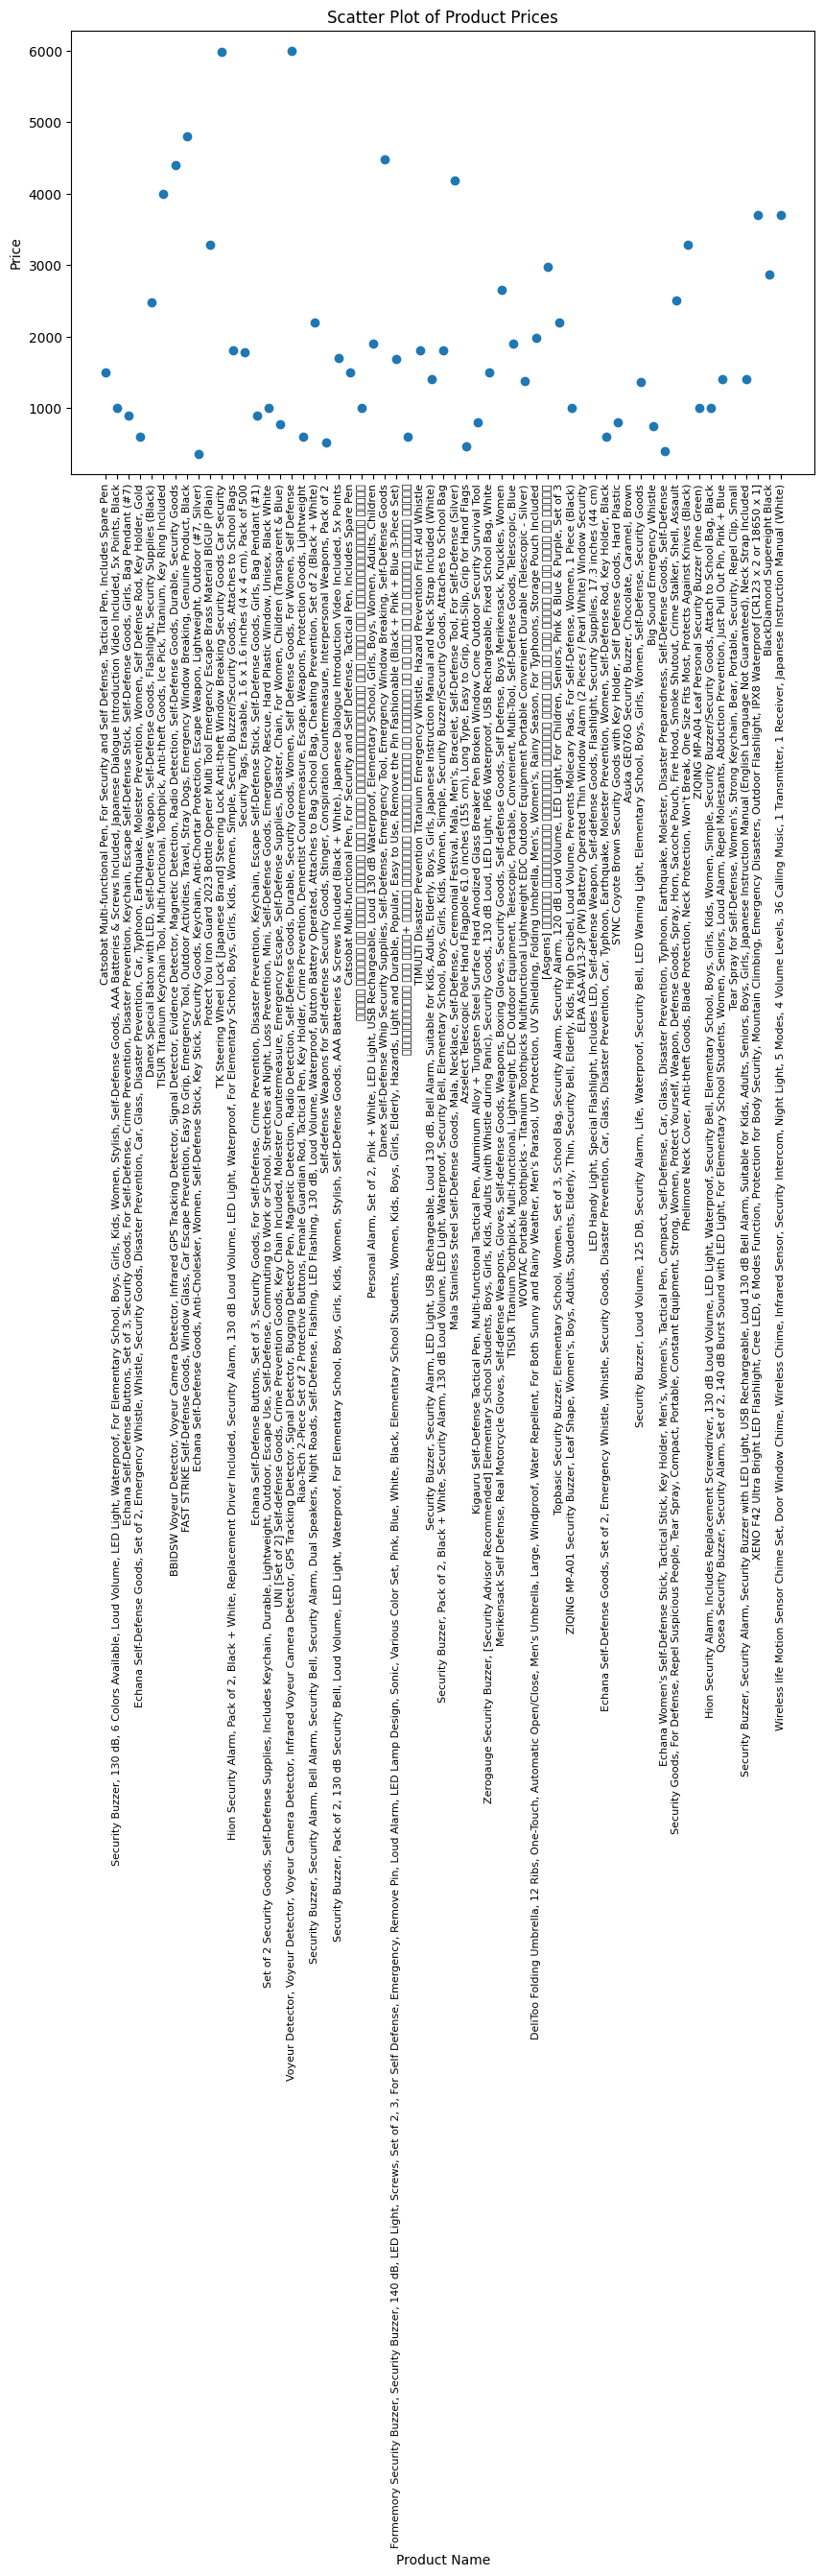

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Your code to create the DataFrame
# ...

# Replace 'N/A' values in 'Price' column with NaN
df['Price'] = df['Price'].replace('N/A', np.nan)

# Convert 'Price' column to numerical values
df['Price'] = df['Price'].replace('[\¥,]', '', regex=True).astype(float)

# Create a scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(np.arange(len(df)), df['Price'])
ax.set_xticks(np.arange(len(df)))
ax.set_xticklabels(df['Product Name'], rotation=90, fontsize=8)  # Adjust fontsize as needed
ax.set_xlabel('Product Name')
ax.set_ylabel('Price')
ax.set_title('Scatter Plot of Product Prices')
plt.tight_layout()

# Calculate median and average
median_price = df['Price'].median()
average_price = df['Price'].mean()

print("Median Price:", median_price)
print("Average Price:", average_price)

# Save the plot as a JPEG image
fig.savefig('scatter_plot.jpg', format='jpeg', bbox_inches='tight')

# Display the plot
plt.show()


Median Price: 1500.0
Average Price: 1972.4545454545455


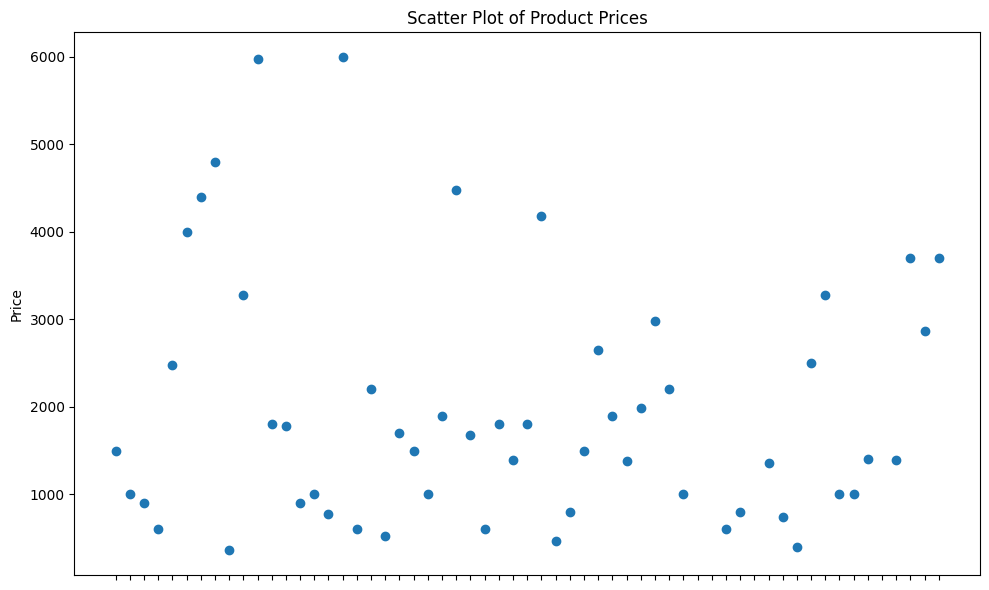

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Your code to create the DataFrame
# ...

# Replace 'N/A' values in 'Price' column with NaN
df['Price'] = df['Price'].replace('N/A', np.nan)

# Convert 'Price' column to numerical values
df['Price'] = df['Price'].replace('[\¥,]', '', regex=True).astype(float)

# Create a scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(np.arange(len(df)), df['Price'])
ax.set_xticks(np.arange(len(df)))
ax.set_xticklabels([])  # Remove x-axis tick labels
ax.set_xlabel('')  # Remove x-axis label
ax.set_ylabel('Price')
ax.set_title('Scatter Plot of Product Prices')
plt.tight_layout()

# Calculate median and average
median_price = df['Price'].median()
average_price = df['Price'].mean()

print("Median Price:", median_price)
print("Average Price:", average_price)

# Save the plot as a JPEG image
fig.savefig('scatter_plot.jpg', format='jpeg', bbox_inches='tight')

# Display the plot
plt.show()


/var/folders/b9/cydbsq5x5glf23_nw44c9y180000gn/T/ipykernel_6085/250512990.py:22: UserWarning: Glyph 65298 (\N{FULLWIDTH DIGIT TWO}) missing from current font.
  plt.tight_layout()
/var/folders/b9/cydbsq5x5glf23_nw44c9y180000gn/T/ipykernel_6085/250512990.py:22: UserWarning: Glyph 20491 (\N{CJK UNIFIED IDEOGRAPH-500B}) missing from current font.
  plt.tight_layout()
/var/folders/b9/cydbsq5x5glf23_nw44c9y180000gn/T/ipykernel_6085/250512990.py:22: UserWarning: Glyph 12475 (\N{KATAKANA LETTER SE}) missing from current font.
  plt.tight_layout()
/var/folders/b9/cydbsq5x5glf23_nw44c9y180000gn/T/ipykernel_6085/250512990.py:22: UserWarning: Glyph 12483 (\N{KATAKANA LETTER SMALL TU}) missing from current font.
  plt.tight_layout()
/var/folders/b9/cydbsq5x5glf23_nw44c9y180000gn/T/ipykernel_6085/250512990.py:22: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from current font.
  plt.tight_layout()
/var/folders/b9/cydbsq5x5glf23_nw44c9y180000gn/T/ipykernel_6085/250512990.py:22: UserWarni

Median Price: 1500.0
Average Price: 1972.4545454545455


/Users/mayumioshige/.pyenv/versions/3.10.11/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65298 (\N{FULLWIDTH DIGIT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mayumioshige/.pyenv/versions/3.10.11/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20491 (\N{CJK UNIFIED IDEOGRAPH-500B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mayumioshige/.pyenv/versions/3.10.11/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12475 (\N{KATAKANA LETTER SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mayumioshige/.pyenv/versions/3.10.11/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12483 (\N{KATAKANA LETTER SMALL TU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mayumioshige/.pyenv/versions/3.10.11/lib/python3.10/site-packages/IPython/core/pyl

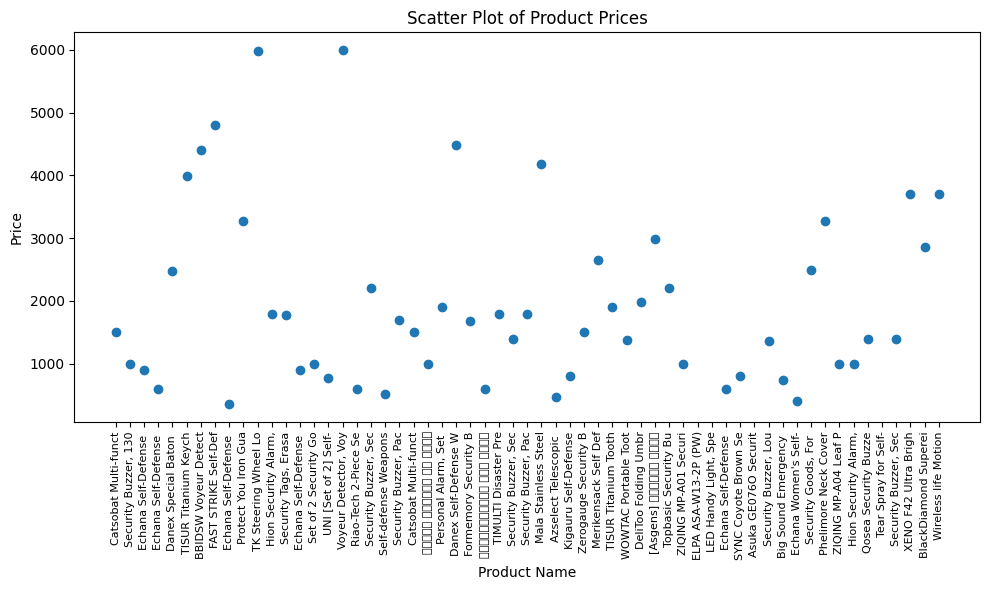

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Your code to create the DataFrame
# ...

# Replace 'N/A' values in 'Price' column with NaN
df['Price'] = df['Price'].replace('N/A', np.nan)

# Convert 'Price' column to numerical values
df['Price'] = df['Price'].replace('[\¥,]', '', regex=True).astype(float)

# Create a scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(np.arange(len(df)), df['Price'])
ax.set_xticks(np.arange(len(df)))
ax.set_xticklabels(df['Product Name'].str[:20], rotation=90, fontsize=8)  # Show first 20 characters
ax.set_xlabel('Product Name')
ax.set_ylabel('Price')
ax.set_title('Scatter Plot of Product Prices')
plt.tight_layout()

# Calculate median and average
median_price = df['Price'].median()
average_price = df['Price'].mean()

print("Median Price:", median_price)
print("Average Price:", average_price)

# Save the plot as a JPEG image
fig.savefig('scatter_plot.jpg', format='jpeg', bbox_inches='tight')

# Display the plot
plt.show()
